In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
import numpy as np

In [3]:
TCs = pd.read_csv('../input/cellPositions/TCPositions_sctintillator.csv', sep=' ')

In [98]:
TCs

,layer,triggercelleta,triggercellphi,triggercellieta,triggercelliphi
0,37.0,-1.709522,-3.119776,-9,144
1,37.0,-1.677480,-3.119776,-10,144
2,37.0,-1.634917,-3.119776,-11,144
3,37.0,-1.592443,-3.119776,-12,144
4,37.0,-1.550064,-3.119776,-13,144
...,...,...,...,...,...
29227,50.0,-1.668360,3.119776,-15,1
29228,50.0,-1.624724,3.119776,-16,1
29229,50.0,-1.581088,3.119776,-17,1
29230,50.0,-1.537451,3.119776,-18,1


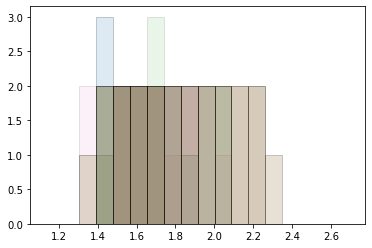

In [79]:
for j in range(37,51):
    (TCs['triggercelleta']*-1)[(TCs['layer']==j) & (TCs['triggercelliphi']==1)].hist(bins=[round(i*0.0870,5) for i in range(13,32)], histtype='bar',ec='black', alpha=0.1)
    plt.grid(None)

In [180]:
thresh ={
        37 : 1.57,
        38 : 1.58,
        39 : 1.59,
        40 : 1.60,
        41 : 1.79,
        42 :1.81,
        43 :1.83,
        44 : 1.85,
        45 : 1.86,
        46 : 1.88,
        47 : 1.90,
        48 : 1.92,
        49 : 1.93,
        50 :1.95
        }

In [182]:
eta_low = []
eta_high = []
eta_mid = []
for j in range(37,51):
    m = (TCs['triggercelleta']*-1)[(TCs['layer']==j) & (TCs['triggercelliphi']==1)]
    eta_low.append(pd.array(m)[-1] - (pd.array(m)[-2] - pd.array(m)[-1])/2)
    eta_high.append(pd.array(m)[0] + (pd.array(m)[0] - pd.array(m)[1])/2)
    for i in range(len(pd.array(m))):
        if pd.array(m)[i]<thresh[j]:
            eta_mid.append(0.5*(pd.array(m)[i]+pd.array(m)[i-1]))
            break

In [192]:
borders = pd.DataFrame({
    "layer": list(range(37,51)),
    "eta_low": eta_low,
    "eta_mid": eta_mid,
    "eta_high": eta_high,    
})

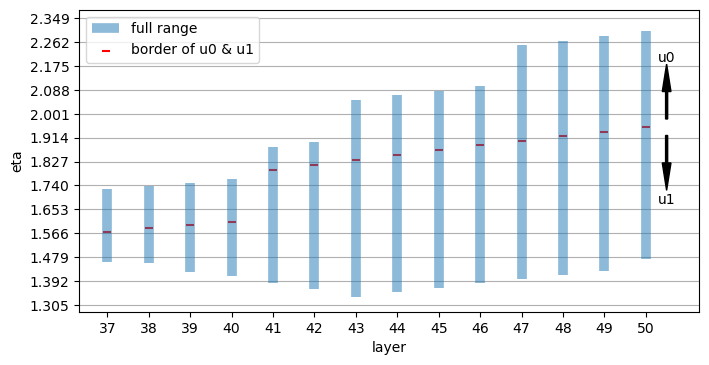

In [524]:
#fig=plt.figure(figsize=(10,6), dpi= 100)
fig=plt.figure(figsize=(8,4), dpi= 100)
plt.vlines(borders['layer'], borders['eta_low'], borders['eta_high'], linestyle='-', lw=7, alpha =0.5, label = 'full range')
plt.scatter(borders['layer'], borders['eta_mid'], marker = "_", color='r', label = 'border of u0 & u1')
ax = plt.gca()
ax.set_xticks(borders['layer'])
ax.set_yticks([i*0.0870 for i in range(15,28)])
ax.set_ylim([1.28,2.38])
ax.set_xlabel('layer')
ax.set_ylabel('eta')
ax.grid(axis='y')
ax.legend(loc=2)
#for layer in borders['layer']:
#    high = borders[borders['layer']==layer]['eta_high'].iloc[0]
#    mid = borders[borders['layer']==layer]['eta_mid'].iloc[0]
#    low = borders[borders['layer']==layer]['eta_low'].iloc[0]
#    plt.text(layer+0.1,0.5*(mid+high) , 'u0')
#    plt.text(layer+0.1,0.5*(mid+low) , 'u1')
ax.set_axisbelow(True)
mid = borders[borders['layer']==50]['eta_mid'].iloc[0]
plt.text(50.3, mid+0.24 , 'u0')
plt.arrow(50.5, mid+0.03 , 0, 0.1, width=0.05, head_length=0.1, head_width=0.21, color='k')
plt.text(50.3, mid-0.28 , 'u1')
plt.arrow(50.5, mid-0.03 , 0, -0.1, width=0.05, head_length=0.1, head_width=0.21, color='k')

In [323]:
2+2

4

In [167]:
m = (TCs['triggercelleta']*-1)[(TCs['layer']==42) & (TCs['triggercelliphi']==1)]


In [168]:
m

8051    1.878372
8052    1.836908
8053    1.793823
8054    1.750785
8055    1.707798
8056    1.664865
8057    1.621990
8058    1.579180
8059    1.536437
8060    1.493766
8061    1.451174
8062    1.408666
8063    1.376918
Name: triggercelleta, dtype: float64

In [126]:
1.493814 -0.021818499999999963

1.4719955

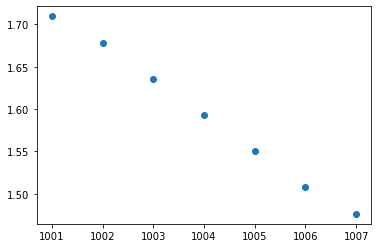

In [103]:
plt.scatter(m.index, m.values)

In [449]:
towerEtaLines = []

for i in range(15, 28):
    towerEtaLines.append(i*0.0870)

In [444]:
layer=50
temp_low = np.zeros(len(towerEtaLines)-1)
temp_high = np.zeros(len(towerEtaLines)-1)
low = borders['eta_low'][borders['layer']==layer].iloc[0]
mid = borders['eta_mid'][borders['layer']==layer].iloc[0]
high = borders['eta_high'][borders['layer']==layer].iloc[0]

for index in range(len(towerEtaLines)-1):
    if ( (towerEtaLines[index] < mid) and (towerEtaLines[index+1] > low )):
        temp_low[index] = min(towerEtaLines[index+1], mid) - max(towerEtaLines[index], low)
    if ( (towerEtaLines[index] < high) and (towerEtaLines[index+1] > mid )):
        temp_high[index] = min(towerEtaLines[index+1], high) - max(towerEtaLines[index], mid)
        

In [456]:
a = {}
a['s']='asd'
a['r']='ad'

In [461]:
N_div = 16
half_N_div = N_div//2

In [462]:
half_N_div

8

In [391]:
borders

,layer,eta_low,eta_mid,eta_high
0,37,1.460440,1.571254,1.725544
1,38,1.456340,1.583345,1.737915
2,39,1.425803,1.595304,1.750144
3,40,1.410980,1.607132,1.762233
4,41,1.386276,1.796967,1.880548
5,42,1.361044,1.815365,1.899104
6,43,1.335281,1.833449,2.049689
7,44,1.351595,1.851226,2.067786
8,45,1.367678,1.868708,2.085571
9,46,1.383539,1.885903,2.103054


In [397]:
min(3,1)

1